In [ ]:
# bench mark 
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import pandas; print("Pandas", pandas.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import tensorflow as tf; print("Tensorflow", tf.__version__)

In [1]:
import os
import pickle
import random
import time

import matplotlib.pyplot as plt
import pandas as pd
from imutils import paths
from kneed import KneeLocator
import pickle
import Accuracy as accuracy
import ImageSearch_Algo_Hash
import ImageSearch_Algo_HSV
import ImageSearch_Algo_ORB
import ImageSearch_Algo_RGB
import ImageSearch_Algo_SIFT
import ImageSearch_Plots as myplots
import Thresholding

# # --------------- Reload modules on :
# %load_ext autoreload
# %autoreload 2


# --------------- TEST PARAMETERS ----------------------#
# TESTNAME = "Data519_RESIZE320"
# TESTNAME = "DataUKBENCH10K"
TESTNAME = "TestData519"
# TESTNAME = "Data519"

# --------------- VAR COMMONS------------------

# IMGDIR = r'./ukbench/'
IMGDIR = r'./imagesbooks/'

# IMGDIR = r'./images/imagesbooks_DENOISE2/'
# IMGDIR = r'./images/imagesbooks_S160/'
# IMGDIR = r'./images/imagesbooks_S320/'
# IMGDIR = r'./images/imagesbooks_CT2.0/'
# IMGDIR = r"V:\\Download\\imagesbooks\\"
# IMGDIRPROCESSED = ['']*5
# IMGDIRPROCESSED[0] = r"V:\\Download\\imagesbooks1\\"
# IMGDIRPROCESSED[1] = r"V:\\Download\\imagesbooks2\\"
# IMGDIRPROCESSED[2] = r"V:\\Download\\imagesbooks3\\"
# IMGDIRPROCESSED[3] = r"V:\\Download\\imagesbooks4\\"
# IMGDIRPROCESSED[4] = r"V:\\Download\\imagesbooks_warp\\"

# --------------- CONFIG PARAMETERS ----------------------#

ORB_FEATURES_LIMIT = 100
ORB_N_CLUSTERS = 500
SIFT_N_CLUSTERS = 500
SIFT_FEATURES_LIMIT = 100
LOWE_RATIO = 0.7
SIFT_PREDICTIONS_COUNT = 100
RGB_PARAMETERCORRELATIONTHRESHOLD = 0.70 # not needed for generation
kneeHSV = 2
kneeRGB = 2
kneeORB = 2
kneeSIFT = 2
HASHLENGTH = 16

# --------------- IMAGES  ----------------------#
imagepaths =  (list(paths.list_images(IMGDIR)))
myDataFiles = pd.DataFrame( {'file' : imagepaths })

Display Images
./imagesbooks/ukbench03097.jpg


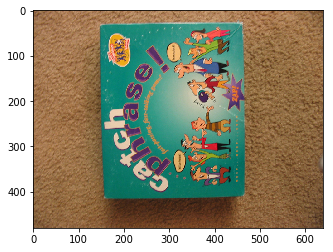

In [5]:
print ("Display Images")
print(imagepaths[0])
img = plt.imread(imagepaths[0])
plt.imshow (img)

In [ ]:
# ! pip install imagehash

In [ ]:
# ----------- GENERATE ALL FEATURES & SAVE ------------ #

# GEN SIFT
sift_features_limit = SIFT_FEATURES_LIMIT
lowe_ratio = LOWE_RATIO
predictions_count = SIFT_PREDICTIONS_COUNT

mydataSIFT, mytime1 = ImageSearch_Algo_SIFT.gen_sift_features(
    imagepaths, sift_features_limit)
print("SIFT Feature Generation time :", mytime1)
savefile = 'data/' + TESTNAME + '_PandasDF_SIFT_Features_kp'+ str(sift_features_limit)
ImageSearch_Algo_SIFT.SIFT_SAVE_FEATURES (mydataSIFT, savefile)
print("SIFT Feature saved to : ", savefile)
# -- END

# GEN ORB
orb_features_limit = ORB_FEATURES_LIMIT

mydataORB, mytime1 = ImageSearch_Algo_ORB.GEN_ORB_FEATURES(imagepaths, orb_features_limit)
print("ORB Feature Generation time :", mytime1)
savefile = 'data/' + TESTNAME + '_PandasDF_ORB_Features_kp'+ str(orb_features_limit)
ImageSearch_Algo_ORB.ORB_SAVE_FEATURES (mydataORB, savefile)
print("ORB Feature saved to : ", savefile)
# -- END

# GEN RGB
parametercorrelationthreshold = 0.70 # not needed for generation

mydataRGB, mytime = ImageSearch_Algo_RGB.RGB_GEN(imagepaths)
print('RGB Feature Generation time', mytime)
savefile = 'data/' + TESTNAME + '_PandasDF_RGB_Features'
ImageSearch_Algo_RGB.RGB_SAVE_FEATURES (mydataRGB, savefile)
print("RGB Feature saved to : ", savefile)
# -- END

# GEN HSV
mydataHSV, mytime = ImageSearch_Algo_HSV.HSV_GEN(imagepaths)
print('HSV Feature Generation time', mytime)
savefile = 'data/' + TESTNAME + '_PandasDF_HSV_Features'
ImageSearch_Algo_HSV.HSV_SAVE_FEATURES (mydataHSV, savefile)
print("HSV Feature saved to : ", savefile)
# -- END


# GEN HASH
mydataHASH, mytime = ImageSearch_Algo_Hash.HASH_GEN(imagepaths, HASHLENGTH)
print("HASH Features Generation time :", mytime)
savefile = 'data/' + TESTNAME + '_PandasDF_HASH_Features'
ImageSearch_Algo_Hash.HASH_SAVE_FEATURES (mydataHASH, savefile)
# -- END

print ("## Feature Generation Complete.")


In [ ]:

# ----------- GENERATE ALL TREES  ------------ #

# RGB TREE
savefile = 'data/' + TESTNAME + '_RGB_Tree'
myRGBtree = ImageSearch_Algo_RGB.RGB_Create_Tree(mydataRGB, savefile=savefile)

# HSV TREE
savefile = 'data/' + TESTNAME + '_HSV_Tree'
myHSVtree = ImageSearch_Algo_HSV.HSV_Create_Tree(mydataHSV, savefile=savefile)

# HASH TREE
AlgoGenList = ['whash', 'phash', 'dhash', 'ahash']
for algo in AlgoGenList :
    savefile = 'data/' + TESTNAME + '_HASH_Tree_' + str(algo)
    myHASHTree = ImageSearch_Algo_Hash.HASH_Create_Tree(mydataHASH, savefile=savefile, hashAlgo=algo)

# HASH TREE USE HYBRID HASH
HybridAlgoList = ['whash', 'ahash']
savefile = 'data/' + TESTNAME + '_HASH_Hybrid_Tree_' + str(('_').join (HybridAlgoList))
myHybridtree = ImageSearch_Algo_Hash.HASH_CREATE_HYBRIDTREE(mydataHASH, savefile, HybridAlgoList)


In [ ]:
# SIFT FV Tree and Cluster
n_clusters = SIFT_N_CLUSTERS
savefile = 'data/' + TESTNAME + '_SIFT_Tree_Cluster' + str(n_clusters)
mySIFTtree, mySIFTmodel, mySIFTFVHist = ImageSearch_Algo_SIFT.SIFT_CREATE_TREE_MODEL(mydataSIFT[:85], savefile, 100)

In [ ]:
mydataSIFT[:100]['siftdes']

In [ ]:
len (mydataSIFT.index)

In [ ]:
mydataSIFT.loc[877]

In [ ]:
d = mydataSIFT.loc[877]['siftdes']
print (d)
d.shape

In [ ]:
len(mydataSIFT[mydataSIFT['siftdes'].isnull()])

In [ ]:
len(mydataSIFT[mydataSIFT['siftdes']==[]])

In [ ]:
# ORB FV Tree and Cluster
n_clusters = 500
savefile = 'data/' + TESTNAME + '_ORB_Tree_Cluster' + str(n_clusters)
myORBtree, myORBmodel, myORBFVHist = ImageSearch_Algo_ORB.ORB_CREATE_TREE_MODEL(mydataORB, savefile, n_clusters)

print ("## Tree Generation Complete.")

In [ ]:
# -----------  LOAD FEATUTES AND TREES from file  ------------ #

HybridAlgoList = ['whash', 'ahash']
AlgoGenList = ['whash', 'phash', 'dhash', 'ahash'] 

# Files 
file_HASH_Feature = 'data/' + TESTNAME + '_PandasDF_HASH_Features'
file_HASH_HybridTree = 'data/' + TESTNAME + '_HASH_Hybrid_Tree_' + str(('_').join (HybridAlgoList))
file_HSV_Cluster = 'data/' + 'test' + '_HSV_Cluster' + str(kneeHSV)
file_HSV_Feature = 'data/' + TESTNAME + '_PandasDF_HSV_Features'
file_HSV_Tree = 'data/' + TESTNAME + '_HSV_Tree'
file_ORB_Cluster = 'data/' + 'test' + '_ORB_Cluster' + str(kneeORB)
file_ORB_Feature = 'data/' + TESTNAME + '_PandasDF_ORB_Features_kp'+ str(ORB_FEATURES_LIMIT)
file_ORB_TreeCluster = 'data/' + TESTNAME + '_ORB_Tree_Cluster' + str(ORB_N_CLUSTERS)
file_Results = 'data/' + TESTNAME + '_Results'
file_RGB_Cluster = 'data/' + 'test' + '_RGB_Cluster' + str(kneeRGB)
file_RGB_Feature = 'data/' + TESTNAME + '_PandasDF_RGB_Features'
file_RGB_Tree = 'data/' + TESTNAME + '_RGB_Tree'
file_SIFT_Cluster = 'data/' + 'test' + '_SIFT_Cluster' + str(kneeSIFT)
file_SIFT_Feature = 'data/' + TESTNAME + '_PandasDF_SIFT_Features_kp'+ str(SIFT_FEATURES_LIMIT)
file_SIFT_TreeCluster = 'data/' + TESTNAME + '_SIFT_Tree_Cluster' + str(SIFT_N_CLUSTERS)

# Features 
mydataRGB = ImageSearch_Algo_RGB.RGB_LOAD_FEATURES (file_RGB_Feature)
mydataHSV = ImageSearch_Algo_HSV.HSV_LOAD_FEATURES (file_HSV_Feature)
mydataSIFT = ImageSearch_Algo_SIFT.SIFT_LOAD_FEATURES (file_SIFT_Feature)
mydataORB = ImageSearch_Algo_ORB.ORB_LOAD_FEATURES(file_ORB_Feature)
mydataHASH = ImageSearch_Algo_Hash.HASH_LOAD_FEATURES(file_HASH_Feature)

In [ ]:
len (mydataSIFT.index)

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
queryimagepath = './ukbench/ukbench00926.jpg'
queryimagepath = './ukbench/ukbench00925.jpg'

queryimagepath = './ukbench/ukbench06528.jpg'


In [ ]:
q_img = cv2.imread(queryimagepath)    
q_img = cv2.cvtColor(q_img, cv2.COLOR_BGR2RGB)
sift = cv2.xfeatures2d.SIFT_create(100)
sift = cv2.ORB_create(100)
q_kp, q_des = sift.detectAndCompute(q_img, None)
plt.imshow(cv2.drawKeypoints(q_img, q_kp, q_img.copy()))

In [ ]:
len(q_kp), len(q_des)

In [ ]:
q_des.shape

In [ ]:
nfeatures = q_des.shape[1]
nfeatures

In [ ]:
padding = numpy.zeros((2, nfeatures))
padding.shape

In [ ]:
q_kp = numpy.vstack((q_kp, padding))
temp = q_des.astype('float')  # convert descriptors to float
descriptors = temp[:]

In [ ]:
mydataSIFT.loc[877]

In [ ]:
d = mydataSIFT.loc[877]['siftdes']
print (d)
d.shape

In [ ]:
# mydataSIFT.describe

In [165]:
import AccuracyGlobal 
import pickle
accuracy = AccuracyGlobal.AccuracyGlobal() # empty class genrated 

# --------------------  DEFINE DIRECTORIES ------------------- # 
# for hash all the images in folder / database 

IMGDIR              = r'./ukbench/'
IMGDIRPROCESSED     = ['']*17

IMGDIRPROCESSED[0]  = r'./images/ukbench1/'
IMGDIRPROCESSED[1]  = r'./images/ukbench2/'
IMGDIRPROCESSED[2]  = r'./images/ukbench_FEXT/'         # Warp in foreground BB 1
IMGDIRPROCESSED[3]  = r'./images/ukbench_FEXTwarp/'     # Warp on foreground BB 2
IMGDIRPROCESSED[4]  = r'./images/ukbench_F_ALLBB/'      # original img with overlayed BB 
IMGDIRPROCESSED[5]  = r'./images/ukbench_S320/'         # Resize to w=320 (50%)
IMGDIRPROCESSED[6]  = r'./images/ukbench_S160/'         # Resize to w=160 (25%)
IMGDIRPROCESSED[7]  = r'./images/ukbench_EQ2/'           # Equalized Histogram 
IMGDIRPROCESSED[8]  = r'./images/ukbench_EQRGB/'        # Equalized Histogram 
IMGDIRPROCESSED[9]  = r'./images/ukbench_CT2.0/'        # increased  contrast
IMGDIRPROCESSED[10]  = r'./images/ukbench_S32/'         # Resize to w=32 (very small)
IMGDIRPROCESSED[11]  = r'./images/ukbench_R90/'         # Rotate by 90 deg 
IMGDIRPROCESSED[12]  = r'./images/ukbench_R180/'         # Rotate by 180 deg 
IMGDIRPROCESSED[13]  = r'./images/ukbench_R270/'         # Rotate by 270 deg 
IMGDIRPROCESSED[14]  = r'./images/ukbench_DENOISE1/'         # Denoise  
IMGDIRPROCESSED[15]  = r'./images/ukbench_DENOISE2/'         # Denoise  
IMGDIRPROCESSED[16]  = r'./images/ukbench_CTYING/'        # increased  contrast

def update_Preprocessed_Dicts() :
    IMGDIRPROCESSED.append(IMGDIR) 
    for DIR in IMGDIRPROCESSED :
        # DIR = IMGDIRPROCESSED[5] # test 
        thisDict = {}
        haystackPaths = sorted(list(paths.list_images(DIR))) #[:2]
        imagefiles = haystackPaths # [:50]
        # print(haystackPaths)

        for f in imagefiles: 
            gkey, gList = accuracy.accuracy_groundtruth_gen(f)
            thisDict[gkey] = gList
        # print (gList)
        # store the file list 
        seedFile = DIR + 'seed'
        outfile = open (seedFile + '.pickle', 'wb')
        pickle.dump( thisDict.keys, outfile )
        print ("[INFO] Saving file ", seedFile)

        # store the file matches (ground truth) dictionary 
        matchesFile = DIR + 'groundTruth'
        outfile = open (matchesFile + '.pickle', 'wb')
        pickle.dump( thisDict, outfile )
        print ("[INFO] Saving file ", matchesFile)

# Run an updates on the preprocessed dicts 
update_Preprocessed_Dicts()

[INFO] Saving file  ./images/ukbench1/seed
[INFO] Saving file  ./images/ukbench1/groundTruth
[INFO] Saving file  ./images/ukbench2/seed
[INFO] Saving file  ./images/ukbench2/groundTruth
[INFO] Saving file  ./images/ukbench_FEXT/seed
[INFO] Saving file  ./images/ukbench_FEXT/groundTruth
[INFO] Saving file  ./images/ukbench_FEXTwarp/seed
[INFO] Saving file  ./images/ukbench_FEXTwarp/groundTruth
[INFO] Saving file  ./images/ukbench_F_ALLBB/seed
[INFO] Saving file  ./images/ukbench_F_ALLBB/groundTruth
[INFO] Saving file  ./images/ukbench_S320/seed
[INFO] Saving file  ./images/ukbench_S320/groundTruth
[INFO] Saving file  ./images/ukbench_S160/seed
[INFO] Saving file  ./images/ukbench_S160/groundTruth
[INFO] Saving file  ./images/ukbench_EQ2/seed
[INFO] Saving file  ./images/ukbench_EQ2/groundTruth
[INFO] Saving file  ./images/ukbench_EQRGB/seed
[INFO] Saving file  ./images/ukbench_EQRGB/groundTruth
[INFO] Saving file  ./images/ukbench_CT2.0/seed
[INFO] Saving file  ./images/ukbench_CT2.0/gr

In [168]:
print (accuracy.check_ground_truth())

Ground Truth Value 0
{}


In [ ]:
from imutils import paths
from PIL import Image
import time
import foregroundextraction as extract
import os 
import matplotlib.pyplot as plt

# to reload module: uncomment use the following 
# %load_ext autoreload
# %autoreload 2


# for hash all the images in folder / database 

IMGDIR = r"../data/imagesbooks/"
IMGDIRPROCESSED = ['']*5
IMGDIRPROCESSED[0] = r"../data/imagesbooks1/"
IMGDIRPROCESSED[1] = r"../data/imagesbooks2/"
IMGDIRPROCESSED[2] = r"../data/imagesbooks3/"
IMGDIRPROCESSED[3] = r"../data/imagesbooks4/"
IMGDIRPROCESSED[4] = r"../data/imagesbooks_warp/"


# check directories, create if not exist
for dir in IMGDIRPROCESSED : 
    if not os.path.exists(os.path.dirname(dir)):
        try:
            os.makedirs(os.path.dirname(dir))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise


In [ ]:
haystackPaths = list(paths.list_images(IMGDIR)) #[:2]
# print(haystackPaths)

# test
image1, image2, image3, image4, bbmap = extract.foregroundExtractAndWarp(haystackPaths[1])    # check 

In [ ]:
plt.imshow(bbmap)

In [ ]:
# Run entire image set and create processed images

# time preprocessing operation 
start = time.time()
counter = 1 
for f in haystackPaths:
    
    image_orig = Image.open(f)
    # image1, image2 = extract.foregroundExtract(f)    # check 
    image1, image2, image3, image4, bbmap = extract.foregroundExtractAndWarp(f)    # check 

    img1 = Image.fromarray(image1)          # 0 filled bg                # check 
    img2 = Image.fromarray(image2)          # transparent bg             # check 
    img3 = Image.fromarray(image3)          # warped bounding box        # check 
    img4 = Image.fromarray(image4)          # warped inner bounding box  # check 
    img5 = Image.fromarray(bbmap)           # warped inner bounding box  # check 
    filename = os.path.basename(f).split('.')[0]
    img1.save( IMGDIRPROCESSED[0] + filename + '.png', format='PNG')
    img2.save( IMGDIRPROCESSED[1] + filename + '.png', format='PNG')
    img3.save( IMGDIRPROCESSED[2] + filename + '.png', format='PNG')
    img4.save( IMGDIRPROCESSED[3] + filename + '.png', format='PNG')
    img5.save( IMGDIRPROCESSED[4] + filename + '.png', format='PNG')
    print ("Processed " , counter , ' ', filename)
    counter += 1

print("[INFO] processed {} images in {:.2f} seconds".format(
len(haystackPaths), time.time() - start))

# Plots Pairwise Corr/data matrix

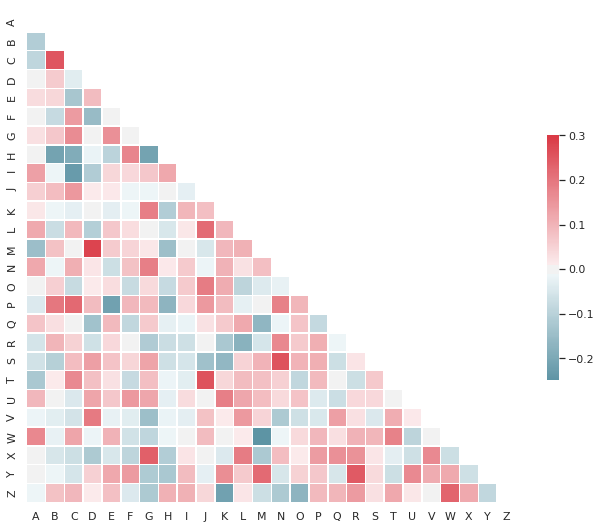

In [6]:
"""
Plotting a diagonal correlation matrix
======================================

_thumb: .3, .6
"""
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# create a correlation matrix (nxn) pd dataframe - pairwise corr. matrix
# type (corr) , corr.head

# Plot Types (classes) with sns KDE plots

Text(3.8, 4.5, 'setosa')

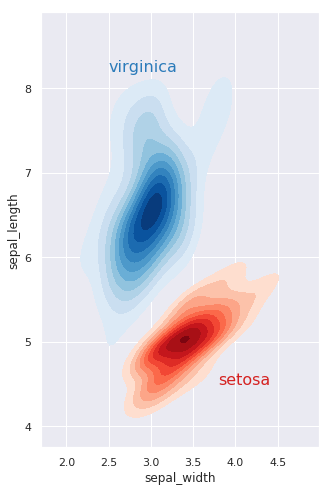

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

In [15]:
# iris.query("species == 'setosa'")
# iris.query("species == 'virginica'")

# SNS multi Variable pairwise plot

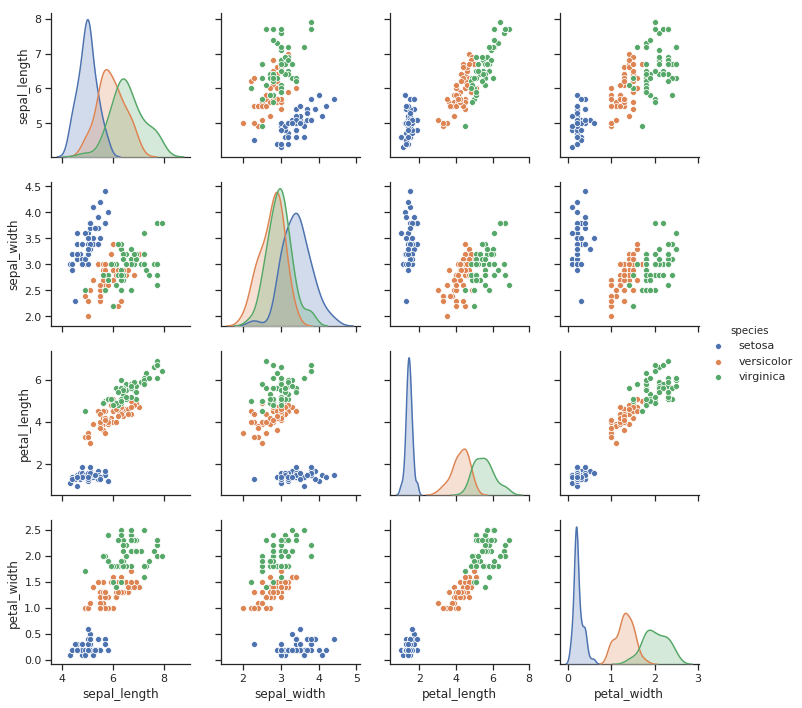

In [31]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


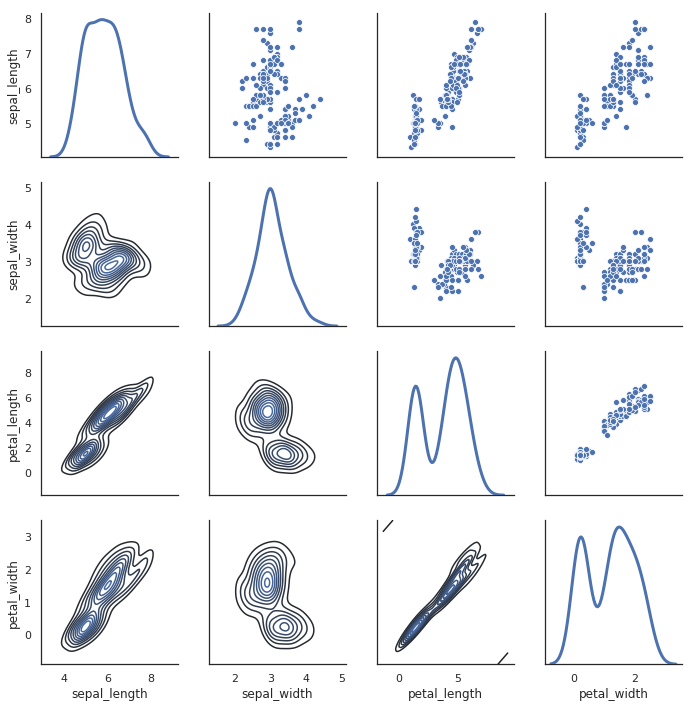

In [33]:
import seaborn as sns
sns.set(style="white")

df = sns.load_dataset("iris")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

# Box plots

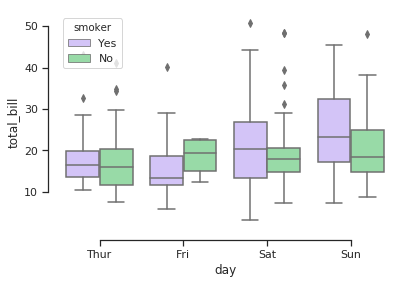

In [19]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [21]:
# Understand data: x="day", y="total_bill", hue="smoker"
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 3D Surface 

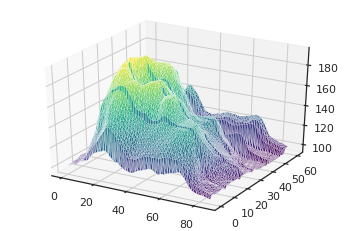

In [24]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

# Stock Price Deltas

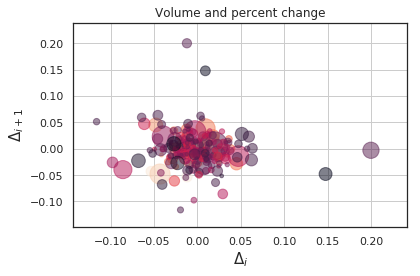

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

In [40]:
len(price_data)

1047

# Line Plots 

/home/towshif/venv2/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


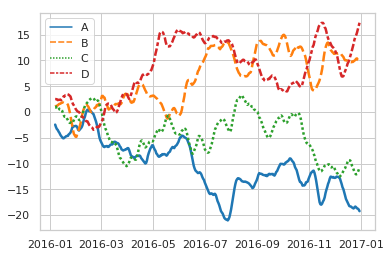

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [ ]:
# # library
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
 
# # Get the data (csv file is hosted on the web)
# url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
# data = pd.read_csv(url)
 
# # Transform it to a long format
# df=data.unstack().reset_index()
# df.columns=["X","Y","Z"]
 
# # And transform the old column name in something numeric
# df['X']=pd.Categorical(df['X'])
# df['X']=df['X'].cat.codes
 
# # We are going to do 20 plots, for 20 different angles
# for angle in range(70,210,2):
#     # Make the plot
#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

#     # Set the angle of the camera
#     ax.view_init(30,angle)
#     # Save it
#     filename='./charts/Volcano_step'+str(angle)+'.png'
#     plt.savefig(filename, dpi=96)
#     plt.gca()

In [ ]:
convert -delay 50 Volcano*.png animated_volcano.gif

# PCA